In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
from sklearn.cluster import KMeans

/home/ibrahim/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
df = pd.read_csv("/home/ibrahim/data/Country-data.csv")

In [6]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
len(df)

167

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<Axes: >

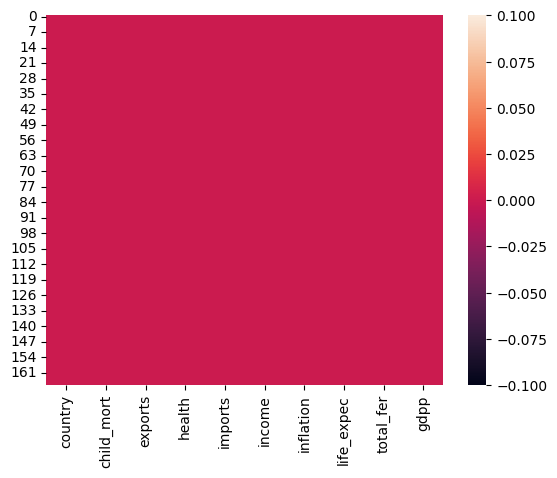

In [11]:
sns.heatmap(df.isna())

### Univariate Analysis

In [12]:
numerical_data = df.select_dtypes(exclude = "object")
numerical_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


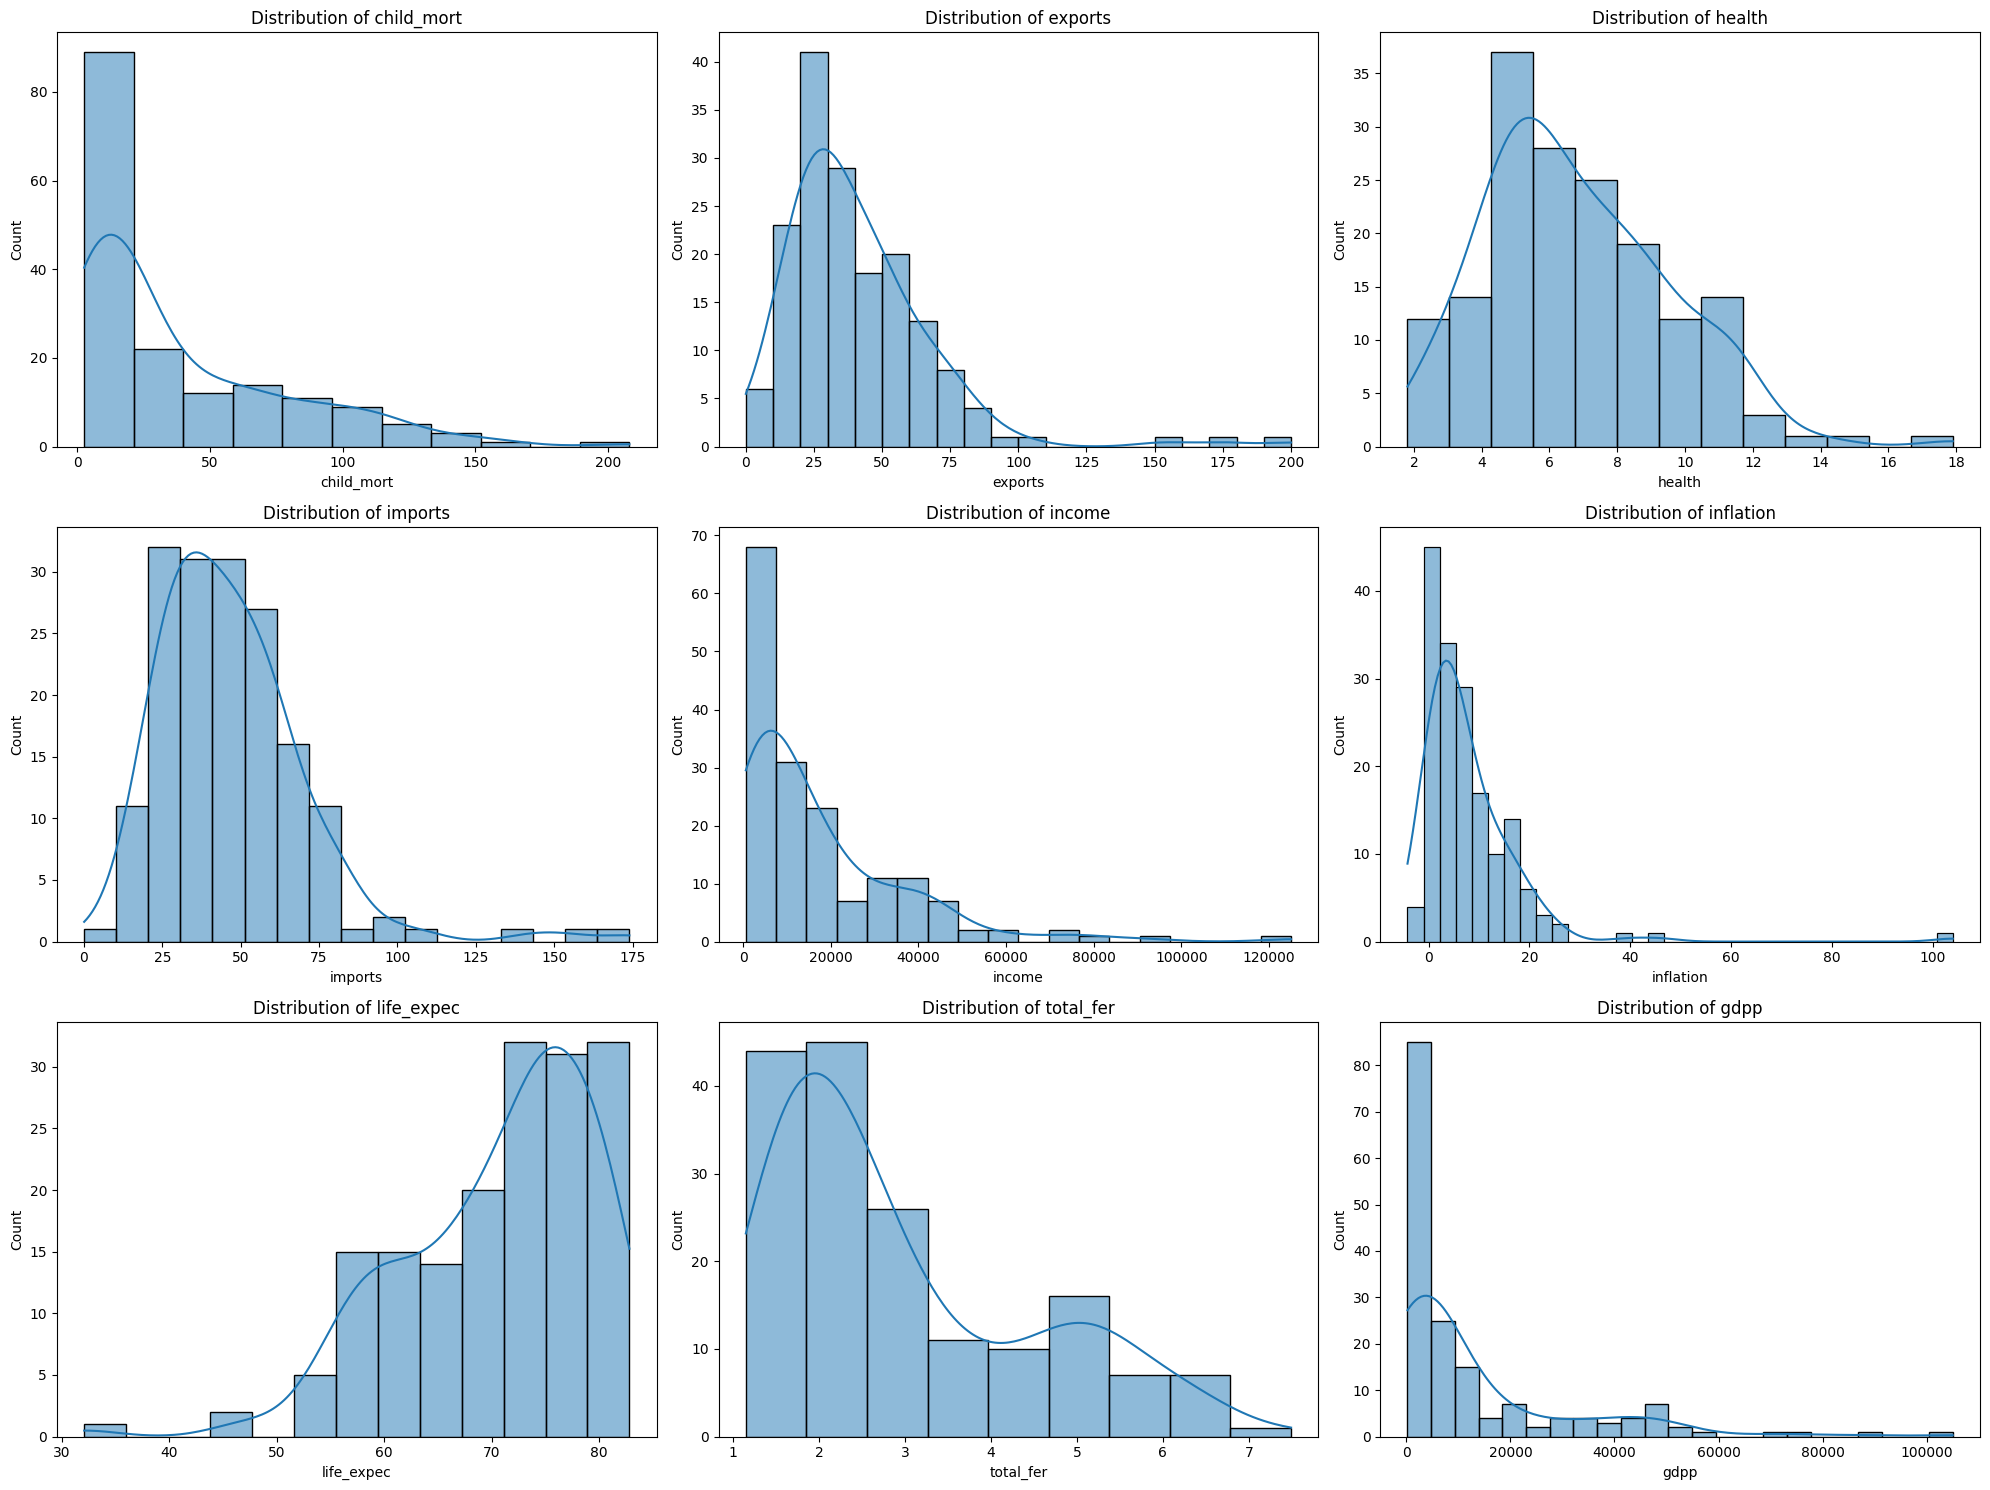

In [13]:
plt.figure(figsize=(20, 15))

for i, column_name in enumerate(numerical_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(numerical_data[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")

plt.tight_layout()
plt.show()

### Bi-Variate Analysis

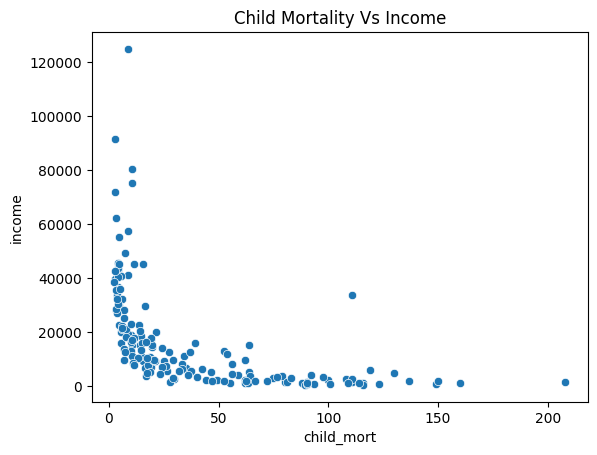

In [14]:
sns.scatterplot(data=df, x="child_mort", y="income")
plt.title("Child Mortality Vs Income")
plt.show()

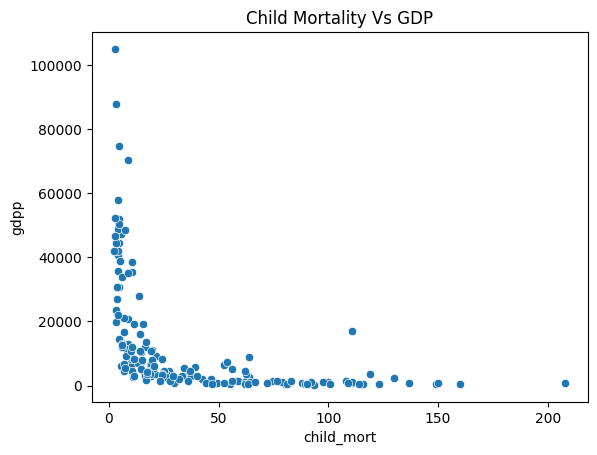

<Figure size 640x480 with 0 Axes>

In [15]:
sns.scatterplot(data=df, x="child_mort", y="gdpp")
plt.title("Child Mortality Vs GDP")
plt.show()
plt.tight_layout()

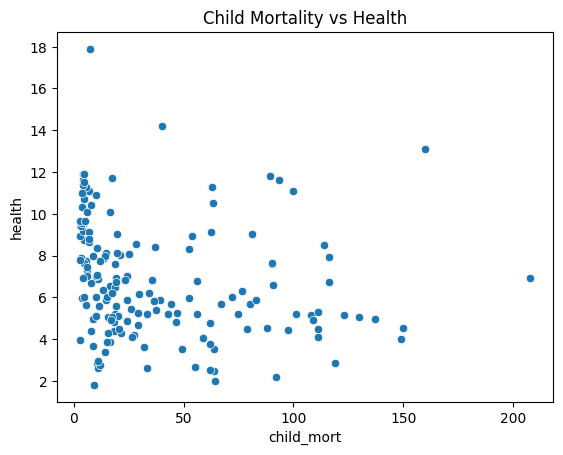

In [16]:
sns.scatterplot(data=df, x="child_mort", y="health")
plt.title("Child Mortality vs Health")
plt.show()

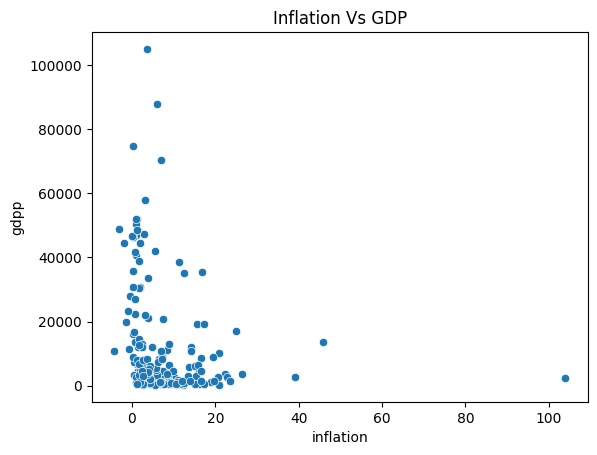

In [17]:
sns.scatterplot(data=df, x="inflation", y="gdpp")
plt.title("Inflation Vs GDP")
plt.show()

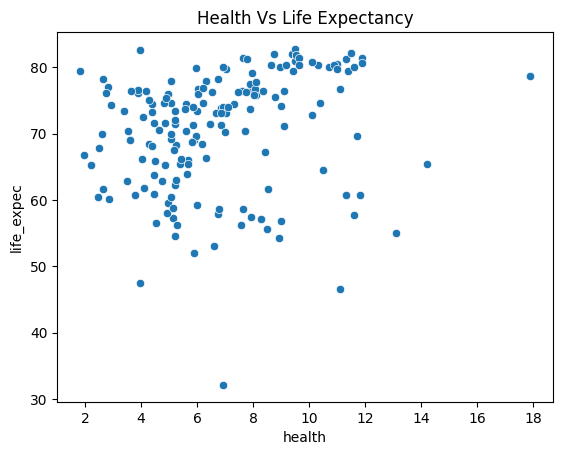

In [18]:
sns.scatterplot(data=df, x="health", y="life_expec")
plt.title("Health Vs Life Expectancy")
plt.show()

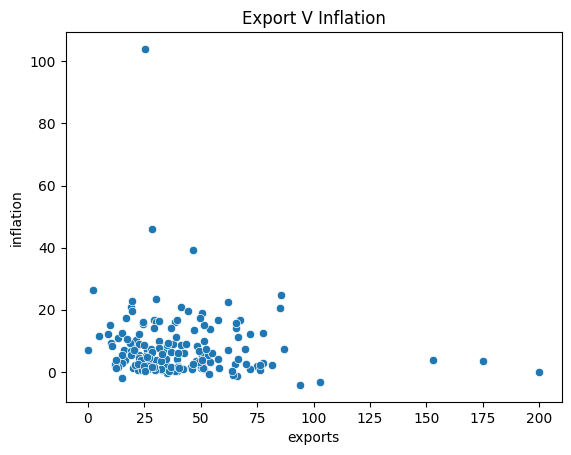

In [19]:
sns.scatterplot(data=df, x="exports", y="inflation")
plt.title("Export V Inflation")
plt.show()

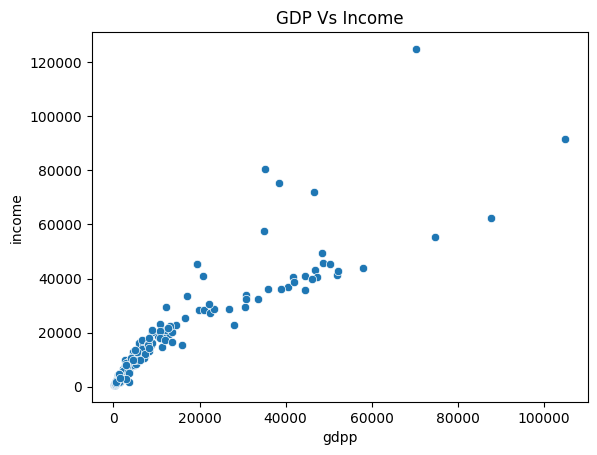

In [20]:
sns.scatterplot(data=df, x="gdpp", y="income")
plt.title("GDP Vs Income")
plt.show()

### Countries with the highest and Least child mortality rate

In [21]:
least_five_mort_rate = df.sort_values(by="child_mort", ascending=True)[:5]   #Ascneding = Lowest to Highest
least_five_mort_rate

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100


In [22]:
top_five_mort_rate = df.sort_values(by="child_mort", ascending=False)[:5]
top_five_mort_rate

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708


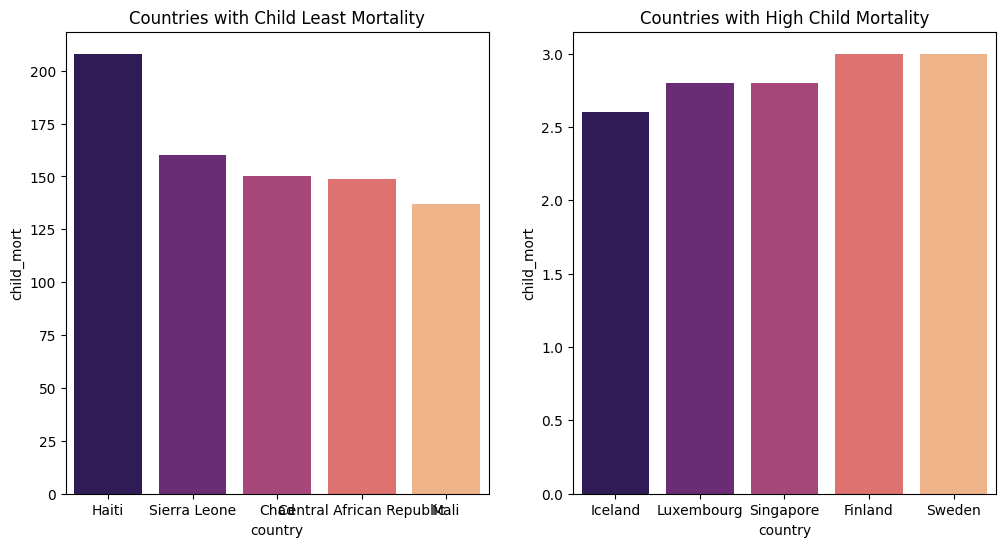

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=top_five_mort_rate, x="country", y="child_mort", hue="country", palette="magma")
plt.title("Countries with Child Least Mortality")

plt.subplot(1, 2, 2)
sns.barplot(data=least_five_mort_rate, x="country", y="child_mort", hue="country", palette="magma")
plt.title("Countries with High Child Mortality")

plt.show()
plt.tight_layout()

### Countries with Highest and Least Exports Levels

In [24]:
df.sort_values(by="exports", ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,200.000,3.96,174.0000,72100,-0.046,82.7,1.15,46600
91,Luxembourg,2.8,175.000,7.77,142.0000,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.000,8.65,154.0000,28300,3.830,80.3,1.36,21100
73,Ireland,4.2,103.000,9.19,86.5000,45700,-3.220,80.4,2.05,48700
131,Seychelles,14.4,93.800,3.40,108.0000,20400,-4.210,73.4,2.17,10800
...,...,...,...,...,...,...,...,...,...,...
109,Nepal,47.0,9.580,5.25,36.4000,1990,15.100,68.3,2.61,592
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231
50,Eritrea,55.2,4.790,2.66,23.3000,1420,11.600,61.7,4.61,482
149,Timor-Leste,62.6,2.200,9.12,27.8000,1850,26.500,71.1,6.23,3600


In [25]:
top_ten_export = df.sort_values(by="exports", ascending=False)[:10]
top_ten_export

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
95,Malaysia,7.9,86.9,4.39,71.0,21100,7.270,74.5,2.15,9070
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.700,60.4,4.95,2740
67,Hungary,6.0,81.8,7.33,76.5,22300,2.330,74.5,1.25,13100
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000


In [26]:
least_ten_export= df.sort_values(by="exports", ascending=False)[157:]
least_ten_export

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,12.400,17.90,15.8000,49400,1.22,78.7,1.93,48400
126,Rwanda,63.6,12.000,10.50,30.0000,1350,2.61,64.6,4.51,563
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.01,47.5,5.21,446
22,Brazil,19.8,10.700,9.01,11.8000,14500,8.41,74.2,1.80,11200
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.44,56.2,5.82,553
109,Nepal,47.0,9.580,5.25,36.4000,1990,15.10,68.3,2.61,592
26,Burundi,93.6,8.920,11.60,39.2000,764,12.30,57.7,6.26,231
50,Eritrea,55.2,4.790,2.66,23.3000,1420,11.60,61.7,4.61,482
149,Timor-Leste,62.6,2.200,9.12,27.8000,1850,26.50,71.1,6.23,3600
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988


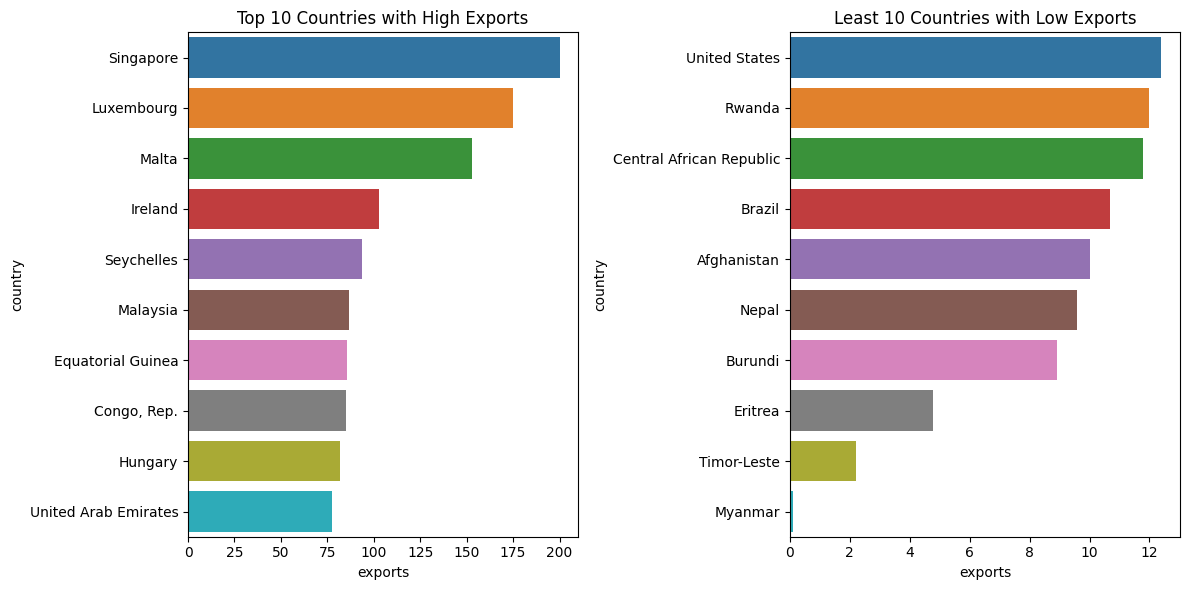

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=top_ten_export, y="country", x="exports", hue="country")
plt.title("Top 10 Countries with High Exports")

plt.subplot(1, 2, 2)
sns.barplot(data=least_ten_export, y="country", x="exports", hue="country")
plt.title("Least 10 Countries with Low Exports")

plt.tight_layout()
plt.show()

### Countries with Highest and Least Spending on Health

In [28]:
df.sort_values(by="health", ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,12.400,17.90,15.8000,49400,1.220,78.7,1.93,48400
101,"Micronesia, Fed. Sts.",40.0,23.500,14.20,81.0000,3340,3.800,65.4,3.46,2860
132,Sierra Leone,160.0,16.800,13.10,34.5000,1220,17.200,55.0,5.20,399
110,Netherlands,4.5,72.000,11.90,63.6000,45500,0.848,80.7,1.79,50300
54,France,4.2,26.800,11.90,28.1000,36900,1.050,81.4,2.03,40600
...,...,...,...,...,...,...,...,...,...,...
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.310,67.9,2.83,4440
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.700,60.4,4.95,2740
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.900,65.3,3.85,1040
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.040,66.8,2.41,988


In [29]:
top_five_health= df.sort_values(by="health", ascending=False)[:5]
top_five_health

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,12.4,17.9,15.8,49400,1.220,78.7,1.93,48400
101,"Micronesia, Fed. Sts.",40.0,23.5,14.2,81.0,3340,3.800,65.4,3.46,2860
132,Sierra Leone,160.0,16.8,13.1,34.5,1220,17.200,55.0,5.20,399
110,Netherlands,4.5,72.0,11.9,63.6,45500,0.848,80.7,1.79,50300
54,France,4.2,26.8,11.9,28.1,36900,1.050,81.4,2.03,40600


In [30]:
least_five_health = df.sort_values(by="health", ascending=True)[:5]
least_five_health

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.300,1.81,23.8000,125000,6.98,79.5,2.07,70300
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.90,65.3,3.85,1040
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.70,60.4,4.95,2740
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440


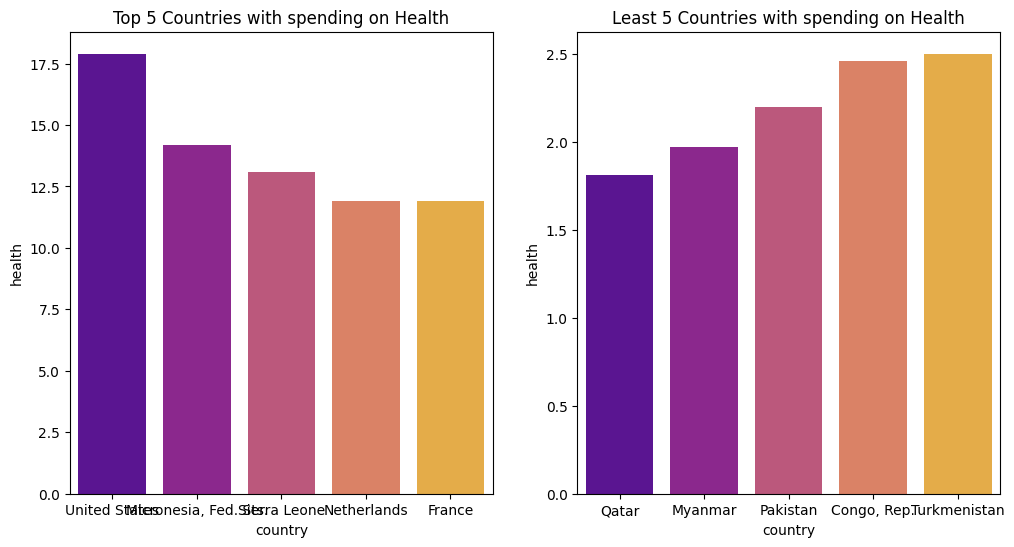

<Figure size 640x480 with 0 Axes>

In [31]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=top_five_health, x="country", y="health", hue="country", palette="plasma")
plt.title("Top 5 Countries with spending on Health")

plt.subplot(1, 2, 2)
sns.barplot(data=least_five_health, x="country", y="health", hue="country", palette="plasma")
plt.title("Least 5 Countries with spending on Health")

plt.show()
plt.tight_layout()

### Country's Life Expectancy 

In [32]:
df.sort_values(by="life_expec", ascending=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
166,Zambia,83.1,37.0,5.89,30.9,3280,14.000,52.0,5.40,1460
94,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459
...,...,...,...,...,...,...,...,...,...,...
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


In [33]:
top_five_life_expectancy = df.sort_values(by="life_expec", ascending=False)[162:]
top_five_life_expectancy

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662


In [34]:
least_five_life_expectancy = df.sort_values(by="life_expec", ascending=True)[:5]
least_five_life_expectancy

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459


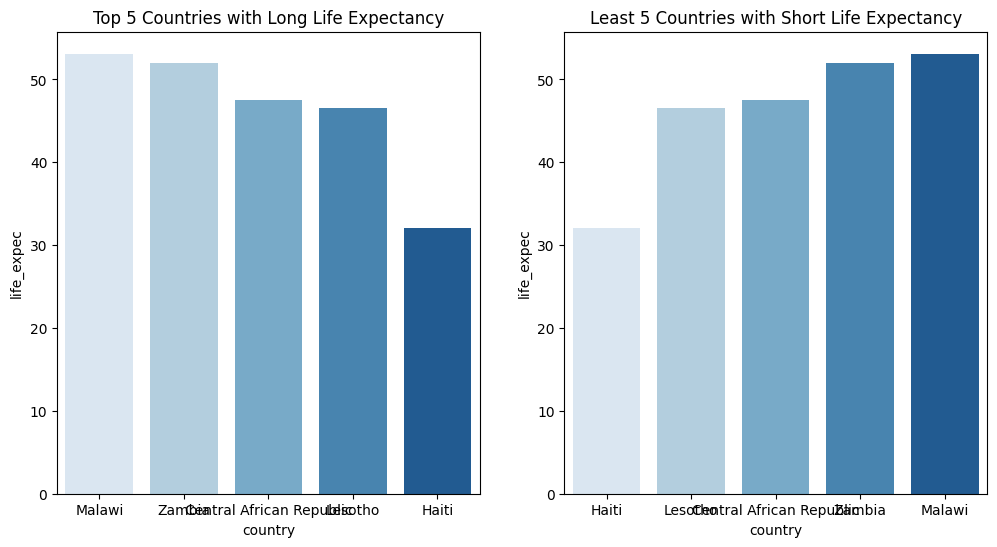

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=top_five_life_expectancy, x="country", y="life_expec", hue="country", palette="Blues")
plt.title("Top 5 Countries with Long Life Expectancy")

plt.subplot(1, 2, 2)
sns.barplot(data=least_five_life_expectancy, x="country", y="life_expec", hue="country", palette="Blues")
plt.title("Least 5 Countries with Short Life Expectancy")

plt.show()
plt.tight_layout()

### Countries Fertility Rate

In [36]:
df.sort_values(by="total_fer", ascending=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,200.00,3.96,174.0,72100,-0.046,82.7,1.15,46600
138,South Korea,4.1,49.40,6.93,46.2,30400,3.160,80.1,1.23,22100
67,Hungary,6.0,81.80,7.33,76.5,22300,2.330,74.5,1.25,13100
102,Moldova,17.2,39.20,11.70,78.5,3910,11.100,69.7,1.27,1630
20,Bosnia and Herzegovina,6.9,29.70,11.10,51.3,9720,1.400,76.8,1.31,4610
...,...,...,...,...,...,...,...,...,...,...
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
97,Mali,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897


In [37]:
top_five_fertility = df.sort_values(by="total_fer", ascending=False)[:5]
top_five_fertility

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
32,Chad,150.0,36.80,4.53,43.5,1930,6.39,56.5,6.59,897
97,Mali,137.0,22.80,4.98,35.1,1870,4.37,59.5,6.55,708
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231


In [38]:
least_five_fertility = df.sort_values(by="total_fer", ascending=True)[:5]
least_five_fertility

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
138,South Korea,4.1,49.4,6.93,46.2,30400,3.160,80.1,1.23,22100
67,Hungary,6.0,81.8,7.33,76.5,22300,2.330,74.5,1.25,13100
102,Moldova,17.2,39.2,11.70,78.5,3910,11.100,69.7,1.27,1630
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610


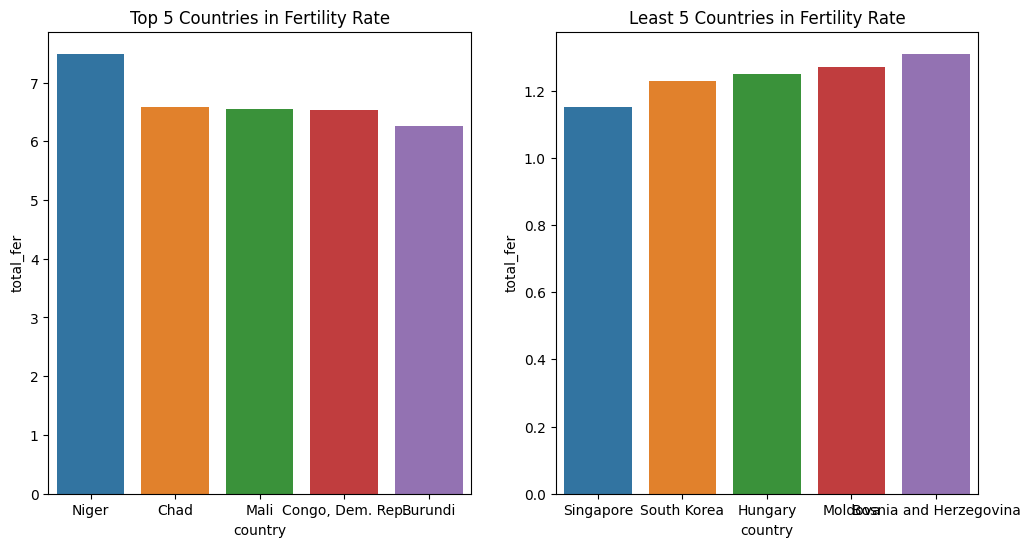

<Figure size 640x480 with 0 Axes>

In [39]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=top_five_fertility, x="country", y="total_fer", hue="country")
plt.title("Top 5 Countries in Fertility Rate")

plt.subplot(1, 2, 2)
sns.barplot(data=least_five_fertility, x="country", y="total_fer", hue="country")
plt.title("Least 5 Countries in Fertility Rate")


plt.show()
plt.tight_layout()

### Country GDP per person

In [40]:
df.sort_values(by="gdpp", ascending=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
...,...,...,...,...,...,...,...,...,...,...
44,Denmark,4.1,50.50,11.40,43.6,44000,3.220,79.5,1.87,58000
123,Qatar,9.0,62.30,1.81,23.8,125000,6.980,79.5,2.07,70300
145,Switzerland,4.5,64.00,11.50,53.3,55500,0.317,82.2,1.52,74600
114,Norway,3.2,39.70,9.48,28.5,62300,5.950,81.0,1.95,87800


In [41]:
top_ten_country_gdp = df.sort_values(by="gdpp", ascending=False)[:10]
top_ten_country_gdp

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


In [42]:
least_ten_country_gdp = df.sort_values(by="gdpp", ascending=False)[157:]
least_ten_country_gdp

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231


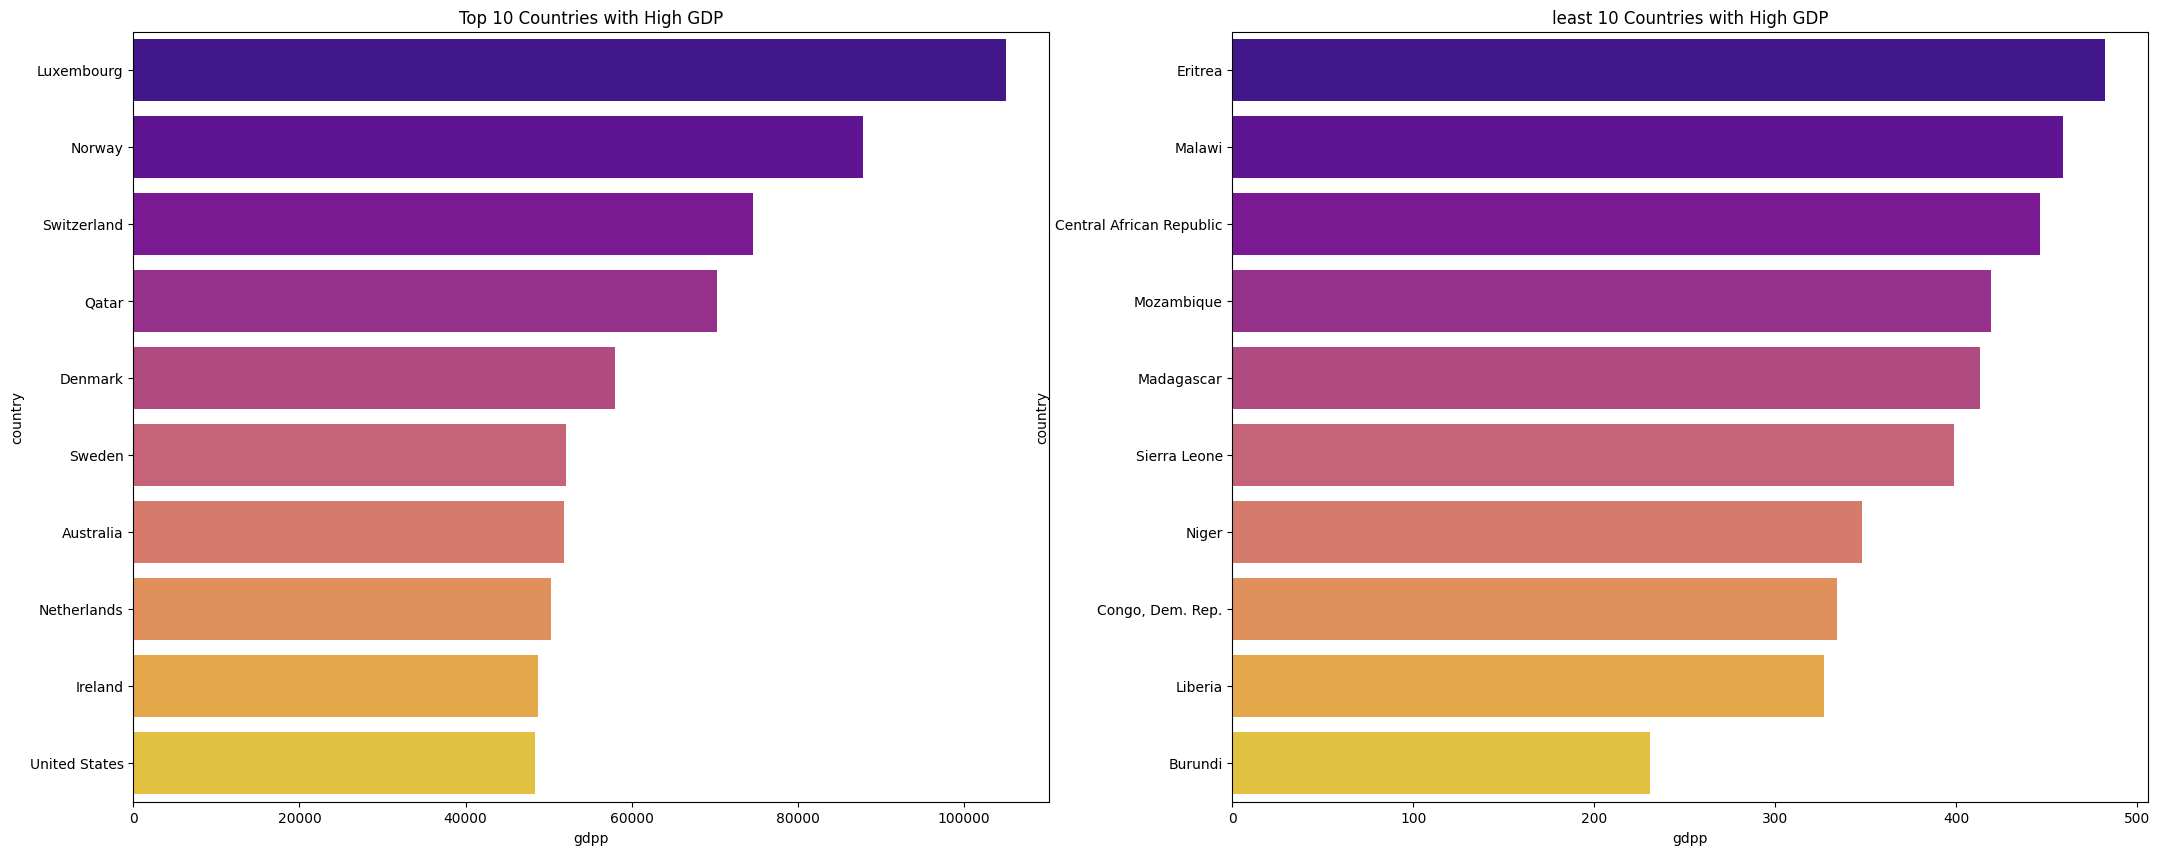

<Figure size 640x480 with 0 Axes>

In [43]:
plt.figure(figsize=(26, 10))

plt.subplot(1, 2, 1)
sns.barplot(data=top_ten_country_gdp, y="country", x="gdpp", hue="country", palette="plasma")
plt.title("Top 10 Countries with High GDP")


plt.subplot(1, 2, 2)
sns.barplot(data=least_ten_country_gdp, y="country", x="gdpp", hue="country", palette="plasma")
plt.title("least 10 Countries with High GDP")

plt.show()
plt.tight_layout()

In [44]:
### Multivariate Analysis

### Multivariate Analysis

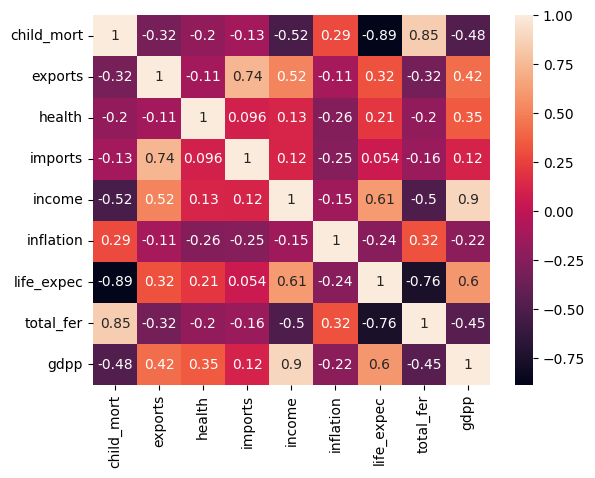

In [45]:
a = numerical_data.corr()
sns.heatmap(a, annot=True)
plt.show()

### Feature Engineering
Basede on our data, it is safe to regroup the features to traing our model

- Health: child_mort, health, life_expec, total_fert
- Finance: income, inflation
- Trade: import, exports, gdpp

In [46]:
df[["child_mort", "health", "life_expec", "total_fer"]]

,child_mort,health,life_expec,total_fer
0,90.2,7.58,56.2,5.82
1,16.6,6.55,76.3,1.65
2,27.3,4.17,76.5,2.89
3,119.0,2.85,60.1,6.16
4,10.3,6.03,76.8,2.13
...,...,...,...,...
162,29.2,5.25,63.0,3.50
163,17.1,4.91,75.4,2.47
164,23.3,6.84,73.1,1.95
165,56.3,5.18,67.5,4.67


In [47]:
new_df = pd.DataFrame()

In [48]:
new_df["Health"] = (
    (df['child_mort'] / df['child_mort'].mean() + 
     df['total_fer'] / df['total_fer'].mean()) - 
    (df['health'] / df['health'].mean() + 
     df['life_expec'] / df['life_expec'].mean())
)

In [49]:
new_df["Trade"] = (
    (df['imports'] / df['imports'].mean() + 
     df['exports'] / df['exports'].mean()) - 
    (df['gdpp'] / df['gdpp'].mean())
)

In [50]:
new_df["Finance"] = (
    (df['income'] / df['income'].mean() - 
     df['inflation'] / df['inflation'].mean())
)

In [51]:
new_df

,Health,Trade,Finance
0,2.422504,1.158156,-1.119175
1,-1.048966,1.402095,0.002203
2,-0.002385,1.259726,-1.316502
3,3.929096,2.158098,-2.534370
4,-0.981553,1.421884,0.929001
...,...,...,...
162,0.287065,2.028381,-0.164617
163,-0.504365,0.027291,-4.935957
164,-0.769324,3.360773,-1.293015
165,1.338566,1.362348,-2.771399


### Feature Scaling

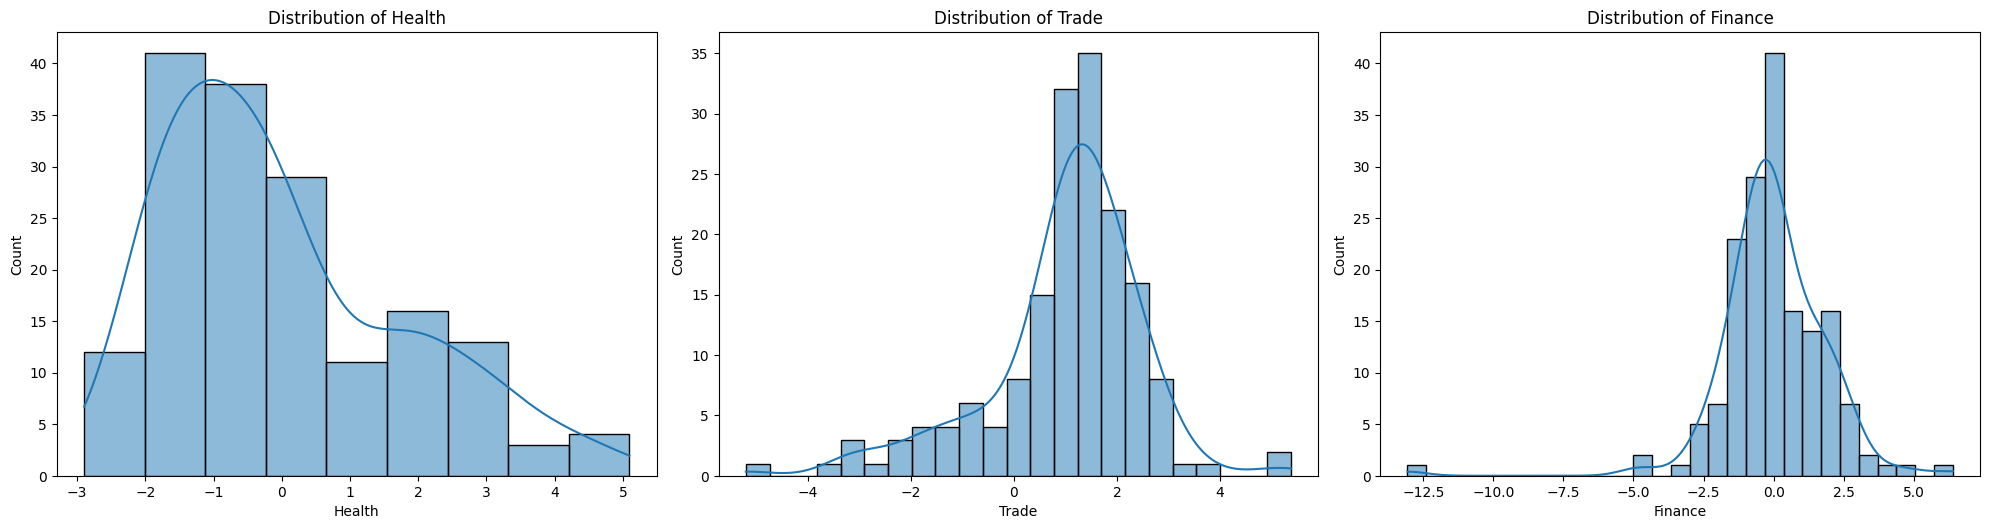

In [52]:
plt.figure(figsize=(20,15))

for i, column_name in enumerate(new_df, 1):
    plt.subplot(3, 3, i)
    sns.histplot(new_df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")

plt.tight_layout()
plt.show()

In [53]:
scaler = StandardScaler()

In [54]:
new_df["Health"] = scaler.fit_transform(new_df[["Health"]])
new_df["Trade"] = scaler.fit_transform(new_df[["Trade"]])
new_df["Finance"] = scaler.fit_transform(new_df[["Finance"]])

In [55]:
new_df.head()

,Health,Trade,Finance
0,1.384975,0.105528,-0.594869
1,-0.599706,0.268295,0.001171
2,-0.001363,0.173300,-0.699752
3,2.246312,0.772732,-1.347078
4,-0.561166,0.281498,0.493787


### Modelling (K-Means)

In [56]:
wcss = []

for i in range(1,11):
    model = KMeans(random_state=42, n_clusters=i, init='k-means++')
    model.fit(new_df)
    wcss.append(model.inertia_)

In [57]:
wcss

[501.00000000000006,
 304.87735396230784,
 192.39886893515023,
 154.4177505477824,
 138.55979315441544,
 115.3098477171877,
 97.28823298310421,
 92.66271152240896,
 82.08602857392539,
 68.56322493403998]

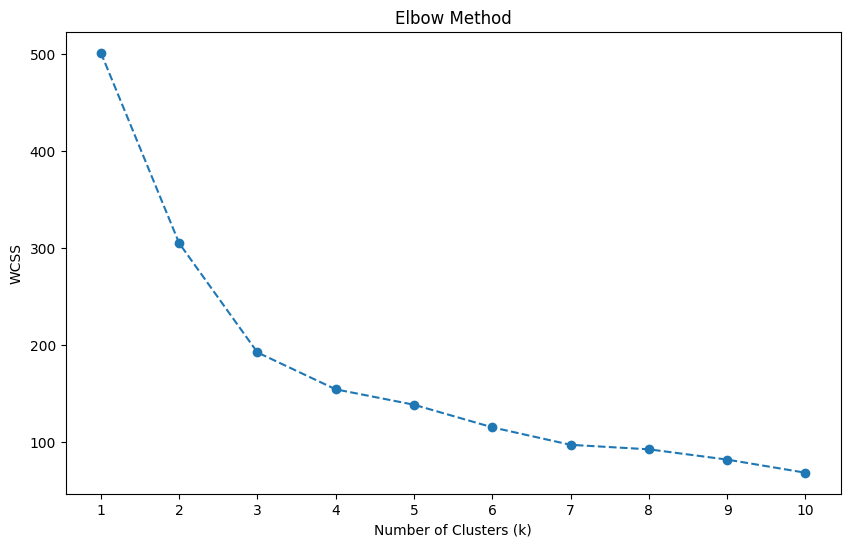

In [58]:
# Plotting the Elbow curve to observe the possible optimal K-Means ckusters

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

In [59]:
# let us use cluster 3
model = KMeans(random_state=42, n_clusters=3, init='k-means++')
model.fit(new_df)

KMeans(n_clusters=3, random_state=42)

In [60]:
# Inspecting our original data without label
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [61]:
model.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2], dtype=int32)

In [62]:
df["class"] = model.labels_

In [63]:
# Inspecting the new engineered feature class
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


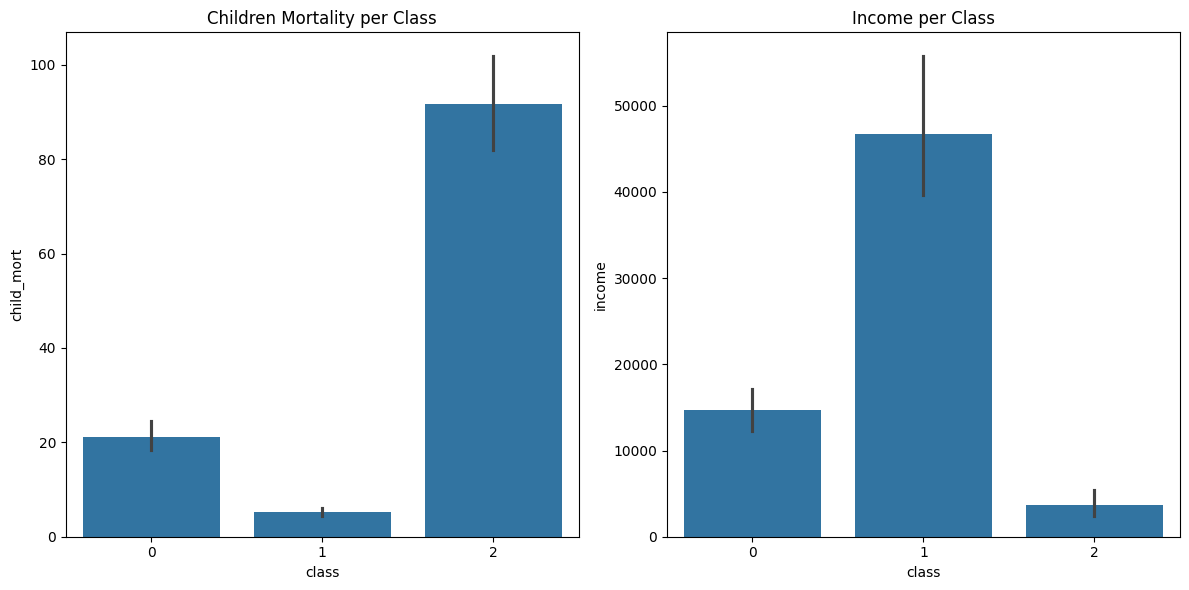

In [64]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x="class", y="child_mort")
plt.title("Children Mortality per Class")

plt.subplot(1, 2, 2)
sns.barplot(data=df, x="class", y="income")
plt.title("Income per Class")

plt.tight_layout()
plt.show()

### Renaming the Classes

- 0: Not a priority
- 1: Requires foreign aid
- 2: Do NOT require foreign aid


In [65]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
df["class"][df["class"]==0] = "Not a priority"
df["class"][df["class"]==1] = "Requires foreign aid"
df["class"][df["class"]==2] = "Do NOT Require foreign aid"

In [67]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Do NOT Require foreign aid
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Not a priority
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Not a priority
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Do NOT Require foreign aid
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Not a priority


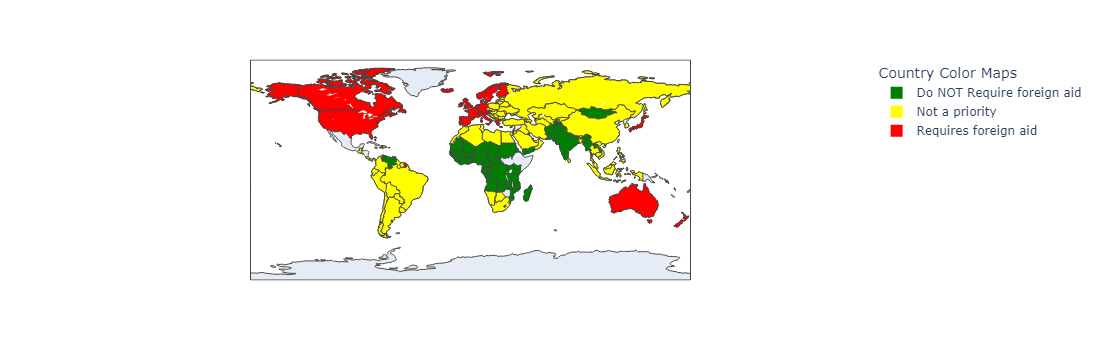

In [69]:
fig = px.choropleth(df[["country", "class"]],
                   locationmode = "country names",
                   locations = "country",
                    color = df["class"],
                    color_discrete_map = {"Requires foreign aid": "Red",
                                          "Do NOT Require foreign aid": "Green",
                                          "Not a priority": "Yellow"
                                         }
                   )

fig.update_layout(legend_title_text="Country Color Maps")
fig.show()